<a href="https://colab.research.google.com/github/baiqtiara/Pemograman-Web/blob/main/Jaringan_Syaraf_Tiruan_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

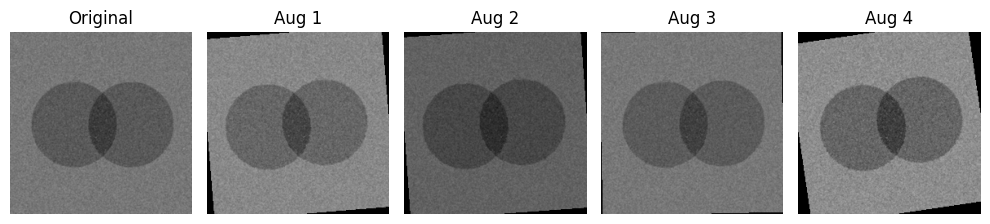

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageFilter
import random

# ==============================
# 1. Membuat contoh citra X-ray
# ==============================
np.random.seed(42)
base = np.random.normal(loc=120, scale=25, size=(512, 512))
base = np.clip(base, 0, 255).astype(np.uint8)

yy, xx = np.mgrid[:512, :512]
mask1 = ((xx-180)**2 + (yy-260)**2) < 120**2
mask2 = ((xx-340)**2 + (yy-260)**2) < 120**2
base[mask1] -= 30
base[mask2] -= 30

img = Image.fromarray(base).filter(ImageFilter.GaussianBlur(1))
img = img.convert("RGB").resize((224, 224))

img.save("original_xray.png")

# ==============================
# 2. Fungsi augmentasi
# ==============================
def augment(image):
    im = image.copy()
    if random.random() > 0.5:
        im = im.transpose(Image.FLIP_LEFT_RIGHT)
    im = im.rotate(random.uniform(-10, 10))
    im = ImageEnhance.Brightness(im).enhance(random.uniform(0.8, 1.2))
    im = ImageEnhance.Contrast(im).enhance(random.uniform(0.8, 1.2))
    return im

augmented_images = [augment(img) for _ in range(4)]

# ==============================
# 3. Visualisasi & simpan hasil
# ==============================
plt.figure(figsize=(10, 3))
plt.subplot(1, 5, 1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

for i, im in enumerate(augmented_images):
    plt.subplot(1, 5, i + 2)
    plt.imshow(im)
    plt.title(f"Aug {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.savefig("hasil_augmentasi.png", dpi=200)
plt.show()